In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 分析数据集
from sklearn import datasets # sklearn自带的datasets中就有Boston房价数据集
housing_data=datasets.load_boston()
dataset_X=housing_data.data # 获取影响房价的特征向量，作为feaure X
dataset_y=housing_data.target # 获取对应的房价，作为label y
# print(dataset_X.shape) # (506, 13) # 一共有506个样本，每个样本有13个features
# print(dataset_y.shape) # (506,)
# print(dataset_X[:5,:]) # 打印看看features的数值类型和大小，貌似已经normalize.

# 将整个数据集划分为train set 和test set两部分
from sklearn.utils import shuffle
dataset_X,dataset_y=shuffle(dataset_X,dataset_y)
# print(dataset_X[:5,:]) # 确认dataset_X 的确发生了shuffle
num_split=int(0.8*len(dataset_X))
train_X,train_y=dataset_X[:num_split],dataset_y[:num_split]
test_X,test_y=dataset_X[num_split:],dataset_y[num_split:]
# print(train_X.shape) # (404, 13)
# print(test_X.shape) # (102, 13)

# 上面的数据集划分也可以采用下面的方法：
# from sklearn.model_selection import train_test_split
# dataset_y=dataset_y[:,np.newaxis]
# dataset=np.hstack((dataset_X,dataset_y))
# print(dataset.shape)
# print(dataset[:,:3])
# train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=37)
# print(train_set.shape) # (404, 14)
# print(test_set.shape) # (102, 14)


In [3]:
# 构建决策树回归模型
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor(max_depth=4) # 最大深度确定为4
decision_regressor.fit(train_X,train_y) # 对决策树回归模型进行训练

# 使用测试集来评价该决策树回归模型
predict_test_y=decision_regressor.predict(test_X)

import sklearn.metrics as metrics
print('决策树回归模型的评测结果----->>>')
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(predict_test_y,test_y),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(predict_test_y,test_y),2)))

决策树回归模型的评测结果----->>>
均方误差MSE：13.33
解释方差分：0.81


In [4]:
# 第一种优化方法：改变max depth来降低MSE,提高解释方差分
for depth in range(2,12):
    decision_regressor_test=DecisionTreeRegressor(max_depth=depth) 
    decision_regressor_test.fit(train_X,train_y)
    predict_test_y2=decision_regressor_test.predict(test_X)
    print('depth: {}, MSE: {:.2f}, EVS: {:.2f}'.format(
        str(depth), metrics.mean_squared_error(predict_test_y2,test_y),
        metrics.explained_variance_score(predict_test_y2,test_y)))

depth: 2, MSE: 23.83, EVS: 0.62
depth: 3, MSE: 20.98, EVS: 0.68
depth: 4, MSE: 13.33, EVS: 0.81
depth: 5, MSE: 13.00, EVS: 0.83
depth: 6, MSE: 14.36, EVS: 0.83
depth: 7, MSE: 11.73, EVS: 0.86
depth: 8, MSE: 16.18, EVS: 0.83
depth: 9, MSE: 15.74, EVS: 0.83
depth: 10, MSE: 14.67, EVS: 0.83
depth: 11, MSE: 15.02, EVS: 0.84


In [5]:
# 第二种优化方法：通过AdaBoost算法来提高模型准确度
from sklearn.ensemble import AdaBoostRegressor
ada_regressor=AdaBoostRegressor(DecisionTreeRegressor(max_depth=7),n_estimators=400)
ada_regressor.fit(train_X,train_y)

# 查看使用AdaBoost算法后模型的MSE 和EVS
predict_test_y=ada_regressor.predict(test_X)

import sklearn.metrics as metrics
print('AdaBoost决策树回归模型的评测结果----->>>')
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(predict_test_y,test_y),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(predict_test_y,test_y),2)))

AdaBoost决策树回归模型的评测结果----->>>
均方误差MSE：7.87
解释方差分：0.9


In [6]:
# 计算不同特征的相对重要性
def plot_importances(feature_importances, title, feature_names):
    '''将feature_importance绘制到图表中，便于观察，
    并把重要性大于5的特征打印出来'''
    # 将重要性都归一化为0-100之内
    feature_importances=100.0*(feature_importances/max(feature_importances))
    
    # 将得分从高到低排序
    index_sorted=np.flipud(np.argsort(feature_importances))
    # 让X坐标轴上的标签居中显示
    pos=np.arange(index_sorted.shape[0])+0.5
    
    # 画条形图
    plt.figure()
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    
    # 把重要性结果打印出来
    print('{} importance list------>>>>>'.format(title))
    for importance,name in zip(feature_importances[index_sorted],
                               feature_names[index_sorted]):
        if importance>5:
            print('feature:{}, importance: {:.2f}'.format(name,importance))

DT regressor importance list------>>>>>
feature:LSTAT, importance: 100.00
feature:RM, importance: 52.24
feature:DIS, importance: 15.97
feature:PTRATIO, importance: 5.00
AdaBoost Optimized DT regressor importance list------>>>>>
feature:LSTAT, importance: 100.00
feature:RM, importance: 46.72
feature:DIS, importance: 21.80
feature:TAX, importance: 7.34
feature:AGE, importance: 7.29
feature:CRIM, importance: 6.51
feature:NOX, importance: 5.32
feature:PTRATIO, importance: 5.29


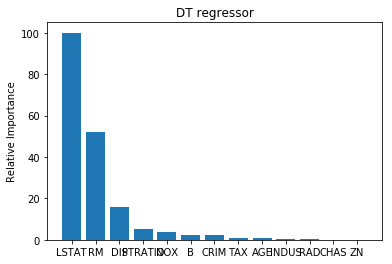

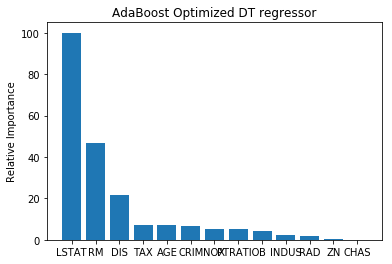

In [7]:
decision_regressor7=DecisionTreeRegressor(max_depth=7) # 最大深度确定为7
decision_regressor7.fit(train_X,train_y) # 对决策树回归模型进行训练
plot_importances(decision_regressor7.feature_importances_,
                 'DT regressor',housing_data.feature_names)
plot_importances(ada_regressor.feature_importances_,
                 'AdaBoost Optimized DT regressor',housing_data.feature_names)